# Необходимые библиотеки

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.display import display, clear_output

# Класс нейрон

In [9]:
class Neuron:
    def __init__(self, input_size: int, weights: np.ndarray = None) -> None:
        """Bipolar neuron with fitting by Widrow-Hoff rule

        Args:
            input_size (int): size of input vectors (x vectors)
            weights (np.ndarray, optional): vector with basic values of weights. Defaults to None.
        """
        
        self._input_size = input_size
        if weights is not None:
            self._weights = weights
        else:
            np.random.seed(41)
            self._weights = np.random.random(size=(input_size, 1))
            # +- 0!!!! random uniform 

    def update(self,
               input_vector: np.ndarray,
               true_value: int,
               learning_rate: float = 0.01) -> None:
        """Update of weights values by Widrow-Hoff rule

        Args:
            input_vector (np.ndarray): vector x
            true_value (int): true value of class (y)
            learning_rate (float, optional): learning rate. Defaults to 0.01.
        """
        
        predicted_value = self.predict(input_vector)
        if predicted_value is not true_value:
            for weight, x in zip(self._weights, input_vector):
                weight += learning_rate * x * (true_value - predicted_value)

    def fit(self,
            input_vectors: np.ndarray,
            true_values: np.ndarray,
            epoch: int = None,
            learning_rate: float = 0.01,#!!!!!!
            verbose: bool = False) -> list:
        """Fitting neuron's weights by input x and y vectors

        Args:
            input_vectors (np.ndarray): vector of x vectors
            true_values (np.ndarray): y vector
            epoch (int, optional): amount of epochs to fit (if None - fitting until all fits). Defaults to None.
            learning_rate (float, optional): learning rate. Defaults to 0.01.
            verbose (bool, optional): flag to output weights changes. Defaults to False.

        Returns:
            list: if verbose - iteration of weights changes, else [1]
        """
        
        if verbose:
            weights = [self._weights.tolist()]
        else:
            weights = [1]

        fitted = False

        while not fitted or (epoch != None and epoch > 0):
            check = True

            for x, true_value in zip(input_vectors, true_values):
                if self.predict(x) != true_value:
                    self.update(x, true_value, learning_rate)
                    check = False

                    if verbose:
                        weights.append(self._weights.tolist())

            if check:
                fitted = True

            if epoch != None:
                epoch -= 1

        return weights

    def predict(self, input_vector: np.ndarray) -> int:
        """Prediction of neuron (multyply vector x and weights vector)

        Args:
            input_vector (np.ndarray): vector to calculate output of neuron

        Returns:
            int: 1 if 1 class, else -1 (2 class)
        """
        
        return np.sign(input_vector @ self._weights)

# Example code

In [10]:
train_x, train_y = datasets.make_blobs(n_samples=10000,
                                       centers=2,
                                       n_features=2,
                                       random_state=11)
train_x = np.insert(train_x, 0, 1, axis=1)
train_y = np.array([1 if y == 0 else -1 for y in train_y])

train_x

array([[  1.        ,  -0.12226535,   4.28722294],
       [  1.        ,  -4.80967467, -11.08177603],
       [  1.        ,  -0.91415963,   4.65454348],
       ...,
       [  1.        ,  -0.66458258,   3.21230248],
       [  1.        ,  -7.57855088,  -8.55850741],
       [  1.        ,  -0.42919007,   5.55830973]])

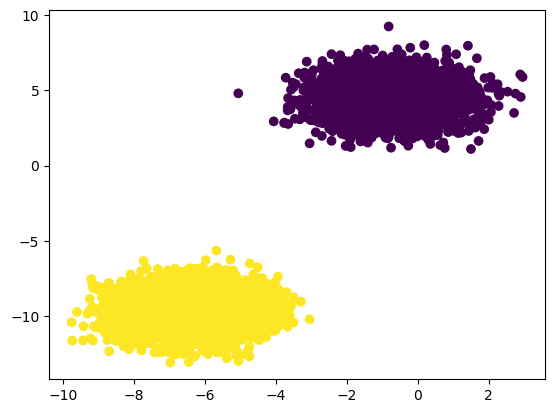

In [11]:
fig, ax = plt.subplots()
ax.scatter(train_x[:, 1], train_x[:, 2], c=train_y)
plt.show()

In [15]:
neuron = Neuron(3)

In [16]:
weights = neuron.fit(train_x, train_y, verbose=True)

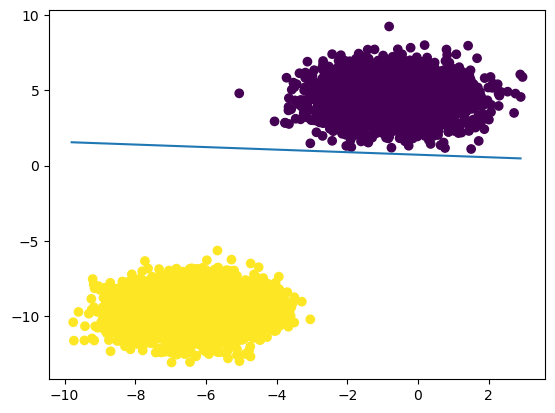

In [18]:
start = round(train_x[:, 1].min() * 10)
stop = round(train_x[:, 1].max() * 10)
x_scale = np.array([i / 10 for i in range(start, stop)])
y_scale = np.array([train_x[:, 2].min(), train_x[:, 2].max()])

fig, ax = plt.subplots()
clear_output(wait=False)


for weight in weights:
    y = [[], []]
    for x in x_scale:
        tmp = (-1) * (weight[0][0] + weight[1][0] * x) / weight[2][0]
        if tmp > y_scale[0] and tmp < y_scale[1]:
            y[0].append(x)
            y[1].append(tmp)

    ax.cla()
    ax.scatter(train_x[:, 1], train_x[:, 2], c=train_y)
    ax.plot(y[0], y[1])

    display(fig)

    clear_output(wait=True)
    plt.pause(0.1)